# Item 1.3: Segundo desafio: Knowledge Discovery in Databases (KDD)

In [ ]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Visualizando os dados
df = pd.read_excel('/home/Cap 01 Asset_PBL_Perfil_Clientes_Top_ECommerce.xlsx')
df.head(10)

,Região País,Estado,Data,FormaPagto,Sexo Informado Cliente,Idade,valor ticket médio,numero pedido
0,Nordeste,Piauí,2023-11-17,Cartão Crédito,F,22,102,37380646
1,Sudeste,São Paulo,2023-10-13,Boleto Bancário,M,21,32,35870530
2,Sudeste,Minas Gerais,2023-12-24,Dinheiro,M,22,101,38158515
3,Sudeste,Espírito Santo,2023-12-19,Dinheiro,F,20,70,36341482
4,Sul,Paraná,2023-12-05,Cartão Débito,M,21,67,38416338
5,Sul,Rio Grande do Sul,2023-09-01,Boleto Bancário,F,22,108,38022271
6,Norte,Acre,2023-12-31,Dinheiro,F,22,49,36263144
7,Norte,Amapá,2023-11-05,Pix,M,21,56,37511576
8,Norte,Pará,2023-11-04,Cartão Crédito,F,22,105,36265605
9,Norte,Rondônia,2023-11-05,Cartão Débito,F,21,93,38213309


## 1) Em relação aos dados disponibilizados, existem dados missing? Descreva o que foi encontrado. Em situações como essa, o que é necessário ser feito?

In [ ]:
# Verificando dados missing
missing_data = df.isnull().sum()
print("Quantidade de dados missing por coluna:")
print(missing_data)

Quantidade de dados missing por coluna:
Região País               0
Estado                    0
Data                      0
FormaPagto                0
Sexo Informado Cliente    0
Idade                     0
valor ticket médio        0
numero pedido             0
dtype: int64


In [ ]:
# Como tratar, caso houvessem dados faltantes:
# Podemos remover as linhas com dados faltantes
df_clean = df.dropna()

## 2) Analise os dados na perspectiva da coluna idade. Existem Outliers nos dados disponibilizados? É possível identificar algo em relação ao ticket médio de vendas relacionadas a esses Outliers? Justifique sua resposta.

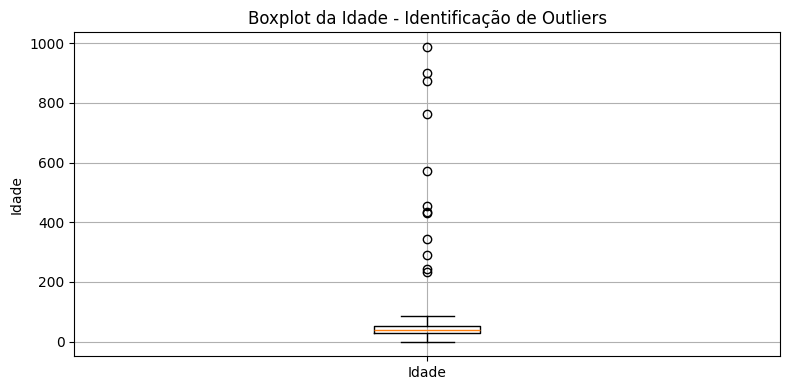

In [ ]:
# Criar boxplot da idade
plt.figure(figsize=(8, 4))
plt.boxplot(df['Idade'], labels=['Idade'])
plt.title('Boxplot da Idade - Identificação de Outliers')
plt.ylabel('Idade')
plt.grid(True)
plt.tight_layout()
plt.show()


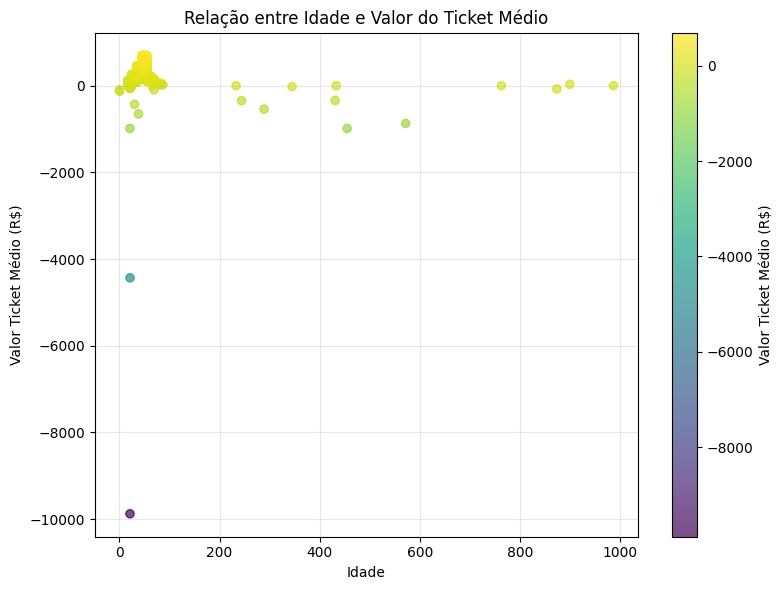

In [ ]:
# Criar scatter plot de Idade x Ticket Médio
plt.figure(figsize=(8, 6))

# Criar o scatter plot usando o valor do ticket como escala de cor
scatter = plt.scatter(df['Idade'],
                     df['valor ticket médio'],
                     c=df['valor ticket médio'],  # Escala de cor baseada no ticket médio
                     cmap='viridis',  # Paleta de cores do azul escuro ao amarelo
                     alpha=0.7)       # 70% de opacidade

# Adicionar barra de cores
plt.colorbar(scatter, label='Valor Ticket Médio (R$)')

# Configurar rótulos e título
plt.xlabel('Idade')
plt.ylabel('Valor Ticket Médio (R$)')
plt.title('Relação entre Idade e Valor do Ticket Médio')

# Adicionar grade
plt.grid(True, alpha=0.3)  # Grade com 30% de opacidade

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## 3) Em relação à consistência do dado valor ticket médio, o que é possível refletir sobre seus conteúdos? Existem dados inconsistentes? Justifique como é possível corrigi-los e realize essa importante atividade, deixando esses dados prontos para análise.

In [ ]:
# Identificando valores inconsistentes
print("Estatísticas do ticket médio antes do tratamento:")
print(df['valor ticket médio'].describe())
print("\nEstatísticas da idade antes do tratamento:")
print(df['Idade'].describe())

# Copiando o df original para a limpeza de dados
df_clean = df.copy()

# Tratamento de Outliers no Ticket Médio
# Definindo os quartis e calculando o intervalo interquartil (IQR)
Q1 = df_clean['valor ticket médio'].quantile(0.25)
Q3 = df_clean['valor ticket médio'].quantile(0.75)
IQR = Q3 - Q1

# Definindo limites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removendo os outliers do ticket médio
df_clean = df_clean[(df_clean['valor ticket médio'] >= lower_bound) & (df_clean['valor ticket médio'] <= upper_bound)]

# Removendo tickets negativos e idades irreais (>100)
df_clean = df_clean[df_clean['valor ticket médio'] >= 0]
df_clean = df_clean[df_clean['Idade'] <= 100]
df_clean = df_clean[df_clean['Idade'] >= 18]

print("\nEstatísticas após limpeza:")
print("\nTicket médio após tratamento:")
print(df_clean['valor ticket médio'].describe())
print("\nIdade após tratamento:")
print(df_clean['Idade'].describe())

Estatísticas do ticket médio antes do tratamento:
count    47835.000000
mean       236.401129
std        166.329410
min      -9876.000000
25%        118.000000
50%        183.000000
75%        345.000000
max        690.000000
Name: valor ticket médio, dtype: float64

Estatísticas da idade antes do tratamento:
count    47835.000000
mean        39.486108
std         16.612886
min          0.000000
25%         27.000000
50%         38.000000
75%         52.000000
max        987.000000
Name: Idade, dtype: float64

Estatísticas após limpeza:

Ticket médio após tratamento:
count    47701.000000
mean       235.943376
std        156.573586
min          0.000000
25%        118.000000
50%        183.000000
75%        344.000000
max        685.000000
Name: valor ticket médio, dtype: float64

Idade após tratamento:
count    47701.000000
mean        39.342278
std         13.981525
min         18.000000
25%         27.000000
50%         38.000000
75%         52.000000
max         87.000000
Name: Ida

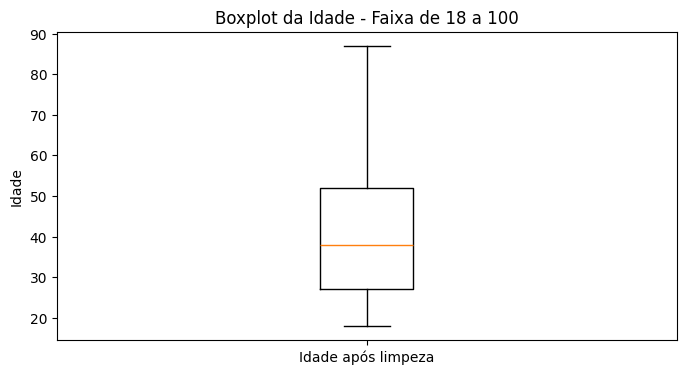

In [ ]:
# Verificar distribuição após limpeza
plt.figure(figsize=(8, 4))
plt.boxplot(df_clean['Idade'], labels=['Idade após limpeza'])
plt.title('Boxplot da Idade - Faixa de 18 a 100')
plt.ylabel('Idade')
plt.show()

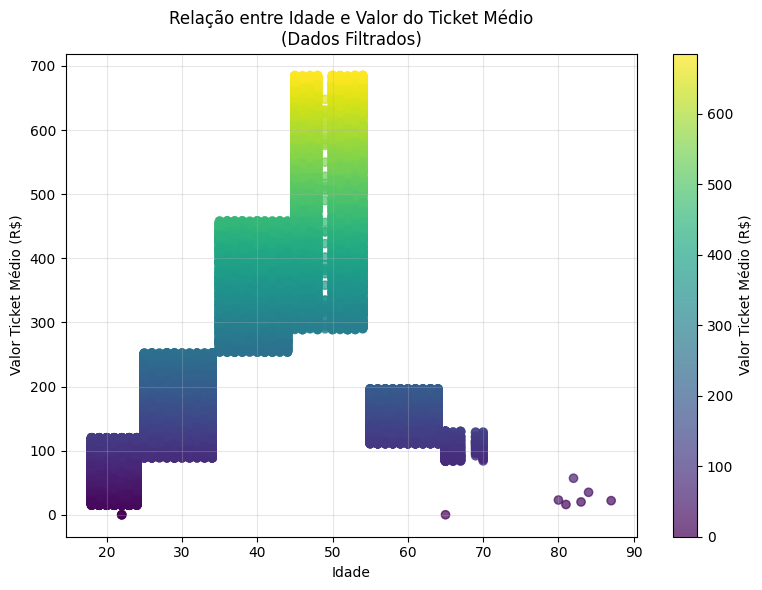

In [ ]:
# Criar scatter plot com dados filtrados
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_clean['Idade'],
                     df_clean['valor ticket médio'],
                     c=df_clean['valor ticket médio'],
                     cmap='viridis',
                     alpha=0.7)

plt.colorbar(scatter, label='Valor Ticket Médio (R$)')
plt.xlabel('Idade')
plt.ylabel('Valor Ticket Médio (R$)')
plt.title('Relação entre Idade e Valor do Ticket Médio\n(Dados Filtrados)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4) A área comercial da Melhores Compras criou um conjunto de faixa etária para tentar compreender melhor o perfil do cliente, mas não conseguiu até o momento chegar a lugar algum. Sendo assim, após aplicar a limpeza e tratamento nos dados, tente contribuir com o departamento comercial gerando informações que auxiliem a tomada de decisão, como valor do ticket médio por faixa etária, idade média dos clientes selecionados, variância da idade, desvio padrão da idade, valor médio e mediana por idade ou faixa etária e ranking das vendas por faixa etária são alguns exemplos de contribuição. Por fim, faça uma análise sobre o resultado alcançado e apresente recomendações para o departamento comercial sobre possíveis ações que podem ser feitas sobre o que foi identificado.

In [ ]:
def criar_faixa_etaria(idade):
    if idade < 25:
        return '18 a 24 anos'
    elif idade < 35:
        return '25 a 34 anos'
    elif idade < 45:
        return '35 a 44 anos'
    elif idade < 55:
        return '45 a 54 anos'
    elif idade < 65:
        return '55 a 64 anos'
    else:
        return 'Acima de 64 anos'

df_clean['Faixa Etária'] = df_clean['Idade'].apply(criar_faixa_etaria)

# Análise por faixa etária incluindo variância
analise_faixa_etaria = df_clean.groupby('Faixa Etária').agg({
    'valor ticket médio': ['count', 'mean', 'median', 'std', 'var'],
    'Idade': ['mean', 'median', 'std', 'var']
}).round(2)

# Renomeando as colunas
analise_faixa_etaria.columns = [
    'Quantidade',
    'Ticket Médio',
    'Ticket Mediana',
    'Ticket Desvio Padrão',
    'Ticket Variância',
    'Idade Média',
    'Idade Mediana',
    'Idade Desvio Padrão',
    'Idade Variância'
]

# Formatando a tabela
tabela_formatada = (analise_faixa_etaria.style
    .format({
        'Quantidade': '{:.0f}',
        'Ticket Médio': 'R$ {:.2f}',
        'Ticket Mediana': 'R$ {:.2f}',
        'Ticket Desvio Padrão': '{:.2f}',
        'Ticket Variância': '{:.2f}',
        'Idade Média': '{:.1f}',
        'Idade Mediana': '{:.0f}',
        'Idade Desvio Padrão': '{:.2f}',
        'Idade Variância': '{:.2f}'
    })
    .background_gradient(cmap='Reds', subset=['Ticket Médio'])
    .background_gradient(cmap='Blues', subset=['Idade Média'])
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#f0f0f0'),
                                   ('color', '#333'),
                                   ('font-weight', 'bold'),
                                   ('text-align', 'center')]},
        {'selector': 'td', 'props': [('padding', '8px')]},
    ])
)

print("\nAnálise por Faixa Etária:")
display(tabela_formatada)


Análise por Faixa Etária:


,Quantidade,Ticket Médio,Ticket Mediana,Ticket Desvio Padrão,Ticket Variância,Idade Média,Idade Mediana,Idade Desvio Padrão,Idade Variância
Faixa Etária,,,,,,,,,
18 a 24 anos,8456,R$ 67.49,R$ 67.00,30.75,945.59,21.2,21,1.91,3.64
25 a 34 anos,12512,R$ 170.56,R$ 170.00,47.16,2223.98,29.4,29,2.92,8.53
35 a 44 anos,9458,R$ 356.40,R$ 357.00,59.11,3493.61,39.3,39,2.77,7.69
45 a 54 anos,7709,R$ 487.48,R$ 487.00,114.81,13181.77,49.6,50,2.98,8.87
55 a 64 anos,8588,R$ 153.30,R$ 153.00,24.84,617.14,59.5,59,2.86,8.21
Acima de 64 anos,978,R$ 106.96,R$ 107.00,15.48,239.75,65.5,65,1.79,3.21



Ranking de vendas por faixa etária:


,Faixa Etária,Valor Total de Vendas
3,45 a 54 anos,R$ 3758012.00
2,35 a 44 anos,R$ 3370869.00
1,25 a 34 anos,R$ 2134005.00
4,55 a 64 anos,R$ 1316550.00
0,18 a 24 anos,R$ 570697.00
5,Acima de 64 anos,R$ 104602.00


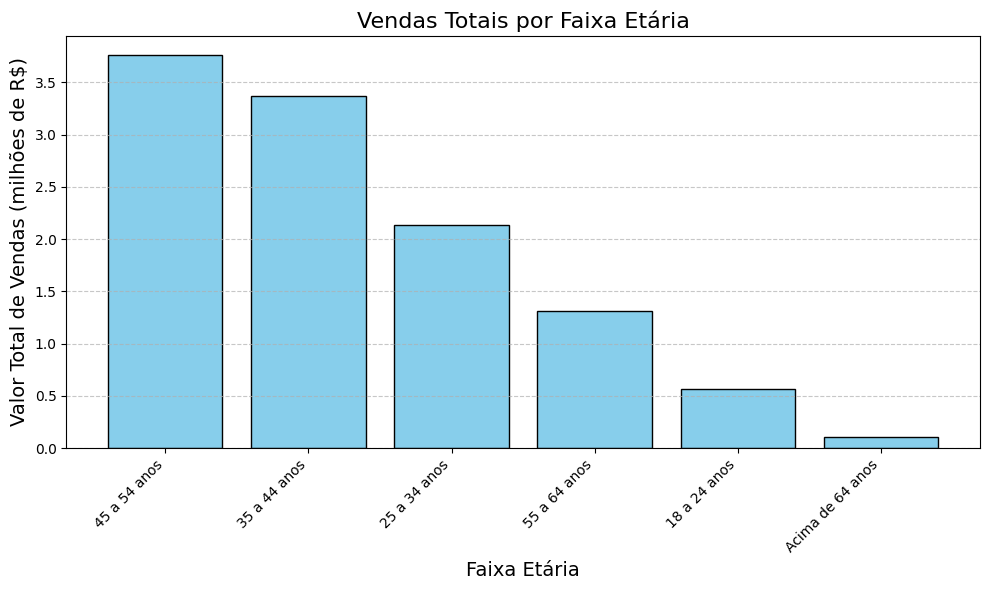

In [ ]:
# Criar o DataFrame do ranking de vendas
ranking_vendas_df = df_clean.groupby('Faixa Etária')['valor ticket médio'].sum().reset_index()
ranking_vendas_df.columns = ['Faixa Etária', 'Valor Total de Vendas']
ranking_vendas_df = ranking_vendas_df.sort_values(by='Valor Total de Vendas', ascending=False)

# Exibir o ranking de vendas de forma mais organizada usando pandas Styler
ranking_vendas_formatado = (
    ranking_vendas_df.style
    .format({'Valor Total de Vendas': 'R$ {:.2f}'})
    .background_gradient(cmap='PuBu', subset=['Valor Total de Vendas'])
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#f0f0f0'),
                                     ('color', '#333'),
                                     ('font-weight', 'bold'),
                                     ('text-align', 'center')]},
        {'selector': 'td', 'props': [('padding', '8px')]},
    ])
)

# Exibir a tabela formatada
from IPython.display import display
print("\nRanking de vendas por faixa etária:")
display(ranking_vendas_formatado)
print()

# Visualização em Gráfico de Barras
plt.figure(figsize=(10, 6))
plt.bar(ranking_vendas_df['Faixa Etária'], ranking_vendas_df['Valor Total de Vendas'] / 1e6, color='skyblue', edgecolor='black')
plt.title('Vendas Totais por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=14)
plt.ylabel('Valor Total de Vendas (milhões de R$)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()